In [8]:
###Sentiment Analysis of 11,000 Medicine Reviews Using Machine Learning

from google.colab import drive
drive.mount('/content/drive')

import os

Mounted at /content/drive


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("singhnavjot2062001/11000-medicine-details")

print("Path to dataset files:", path)

100%|██████████| 763k/763k [00:00<00:00, 88.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/singhnavjot2062001/11000-medicine-details/versions/87


In [11]:
import os

# Construct the path to the CSV file
csv_path = os.path.join(path, 'Medicine_Details.csv')

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_path)

In [12]:
# List files in the downloaded directory
print(os.listdir(path))

['Medicine_Details.csv']


In [13]:
df.head(4)

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35


In [14]:
df.tail(4)

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
11821,Zipcoz Tablet,Chromium Picolinate (100mcg) + D-Chiro Inosito...,Polycystic ovarian syndrome (PCOS),Rash Nausea Paresthesia tingling or pricking s...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Lifeline Remedies India Pvt Ltd,0,80,20
11822,Zestasil 100 Tablet,Sildenafil (100mg),Treatment of Erectile dysfunction,Flushing sense of warmth in the face ears neck...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",TBG pharma ltd,25,75,0
11823,Zedruff Shampoo,Ketoconazole (2% w/v) + Zinc pyrithione (1% w/v),Treatment of Dandruff,Application site reactions burning irritation ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Minova Life Sciences Pvt Ltd,0,0,100
11824,Zedruff Shampoo,Ketoconazole (2% w/v) + Zinc pyrithione (1% w/v),Treatment of Dandruff,Application site reactions burning irritation ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Minova Life Sciences Pvt Ltd,0,0,100


In [15]:
print(df.head())
print(df.tail())

              Medicine Name  \
0   Avastin 400mg Injection   
1  Augmentin 625 Duo Tablet   
2       Azithral 500 Tablet   
3          Ascoril LS Syrup   
4         Aciloc 150 Tablet   

                                         Composition  \
0                                Bevacizumab (400mg)   
1    Amoxycillin  (500mg) +  Clavulanic Acid (125mg)   
2                               Azithromycin (500mg)   
3  Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...   
4                                 Ranitidine (150mg)   

                                                Uses  \
0   Cancer of colon and rectum Non-small cell lun...   
1                  Treatment of Bacterial infections   
2                  Treatment of Bacterial infections   
3                      Treatment of Cough with mucus   
4  Treatment of Gastroesophageal reflux disease (...   

                                        Side_effects  \
0  Rectal bleeding Taste change Headache Noseblee...   
1  Vomiting Nausea Diarrhea

In [16]:
df.columns

Index(['Medicine Name', 'Composition', 'Uses', 'Side_effects', 'Image URL',
       'Manufacturer', 'Excellent Review %', 'Average Review %',
       'Poor Review %'],
      dtype='object')

In [17]:
df.head(2)
df.tail(2)

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
11823,Zedruff Shampoo,Ketoconazole (2% w/v) + Zinc pyrithione (1% w/v),Treatment of Dandruff,Application site reactions burning irritation ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Minova Life Sciences Pvt Ltd,0,0,100
11824,Zedruff Shampoo,Ketoconazole (2% w/v) + Zinc pyrithione (1% w/v),Treatment of Dandruff,Application site reactions burning irritation ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Minova Life Sciences Pvt Ltd,0,0,100


In [18]:
df=df.fillna(0)

In [19]:
df=df.drop_duplicates()

In [59]:
df.drop(['Image URL'],axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11741 entries, 0 to 11823
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Medicine Name       11741 non-null  object
 1   Composition         11741 non-null  object
 2   Uses                11741 non-null  object
 3   Side_effects        11741 non-null  object
 4   Image URL           11741 non-null  object
 5   Manufacturer        11741 non-null  object
 6   Excellent Review %  11741 non-null  int64 
 7   Average Review %    11741 non-null  int64 
 8   Poor Review %       11741 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 917.3+ KB


In [21]:
df.dtypes

,0
Medicine Name,object
Composition,object
Uses,object
Side_effects,object
Image URL,object
Manufacturer,object
Excellent Review %,int64
Average Review %,int64
Poor Review %,int64


In [22]:
df.nunique()

,0
Medicine Name,11498
Composition,3358
Uses,712
Side_effects,1512
Image URL,11740
Manufacturer,759
Excellent Review %,85
Average Review %,79
Poor Review %,81


In [23]:
print(df.duplicated().sum())

0


In [24]:
print(df.isnull().count())

Medicine Name         11741
Composition           11741
Uses                  11741
Side_effects          11741
Image URL             11741
Manufacturer          11741
Excellent Review %    11741
Average Review %      11741
Poor Review %         11741
dtype: int64


In [25]:
df.isnull()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
11819,False,False,False,False,False,False,False,False,False
11820,False,False,False,False,False,False,False,False,False
11821,False,False,False,False,False,False,False,False,False
11822,False,False,False,False,False,False,False,False,False


Text(0.5, 0, 'Excellent Review %')

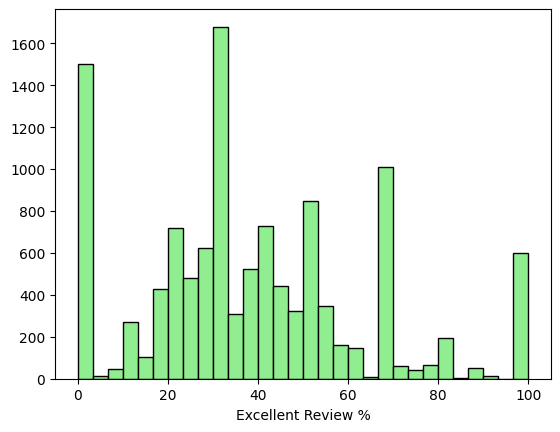

In [26]:
plt.hist(df['Excellent Review %'],bins=30,edgecolor='black',color='lightgreen')
plt.xlabel('Excellent Review %')

In [27]:
df_numerical=df.select_dtypes(include=np.number)
df_numerical.columns

Index(['Excellent Review %', 'Average Review %', 'Poor Review %'], dtype='object')

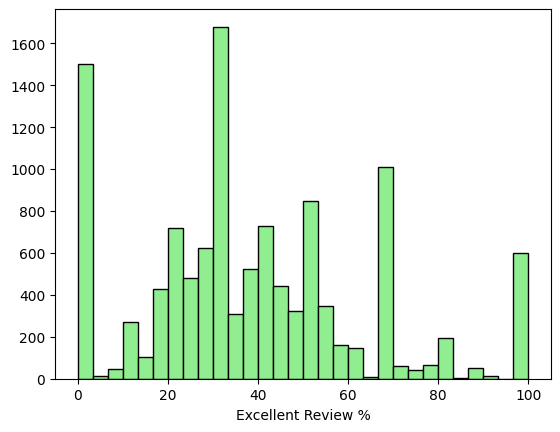

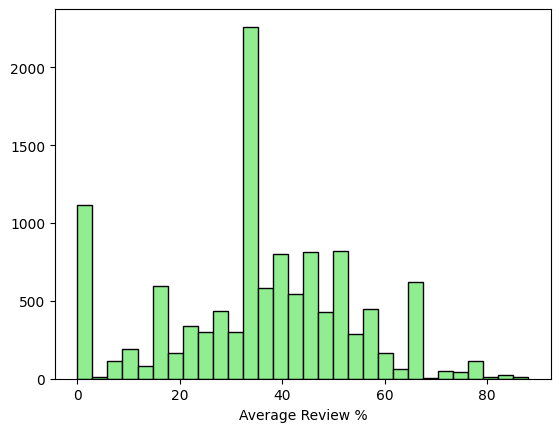

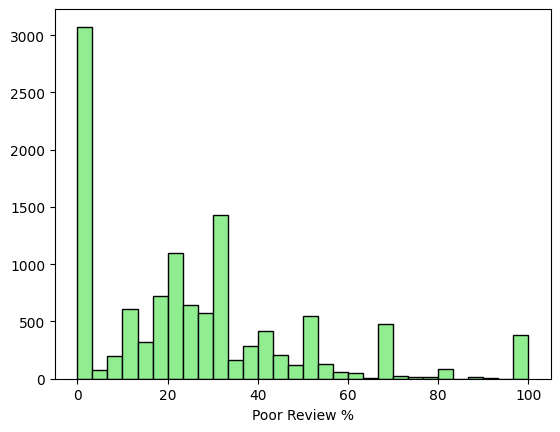

In [28]:
for i in df_numerical.columns:
    plt.hist(df[i],bins=30,edgecolor='black',color='lightgreen')
    plt.xlabel(i)
    plt.show()

In [29]:
df.columns

Index(['Medicine Name', 'Composition', 'Uses', 'Side_effects', 'Image URL',
       'Manufacturer', 'Excellent Review %', 'Average Review %',
       'Poor Review %'],
      dtype='object')

<Axes: xlabel='Medicine Name', ylabel='Poor Review %'>

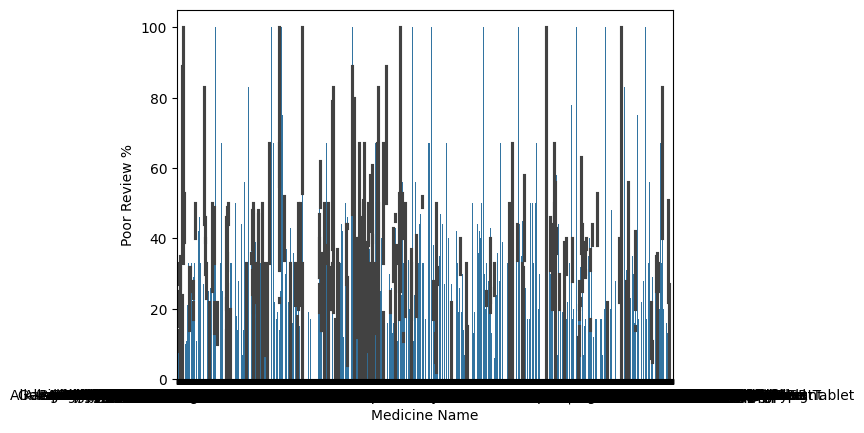

In [30]:
sns.barplot(x='Medicine Name',y='Poor Review %',data=df)

In [31]:
df.describe()

,Excellent Review %,Average Review %,Poor Review %
count,11741.000000,11741.000000,11741.000000
mean,38.505068,35.783494,25.711439
std,25.192156,18.264038,23.949109
min,0.000000,0.000000,0.000000
25%,22.000000,27.000000,0.000000
50%,34.000000,35.000000,22.000000
75%,51.000000,47.000000,35.000000
max,100.000000,88.000000,100.000000


In [32]:
df.columns

Index(['Medicine Name', 'Composition', 'Uses', 'Side_effects', 'Image URL',
       'Manufacturer', 'Excellent Review %', 'Average Review %',
       'Poor Review %'],
      dtype='object')

In [33]:
import pandas as pd

In [34]:
df.describe()

,Excellent Review %,Average Review %,Poor Review %
count,11741.000000,11741.000000,11741.000000
mean,38.505068,35.783494,25.711439
std,25.192156,18.264038,23.949109
min,0.000000,0.000000,0.000000
25%,22.000000,27.000000,0.000000
50%,34.000000,35.000000,22.000000
75%,51.000000,47.000000,35.000000
max,100.000000,88.000000,100.000000


In [35]:
df.head(2)

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18


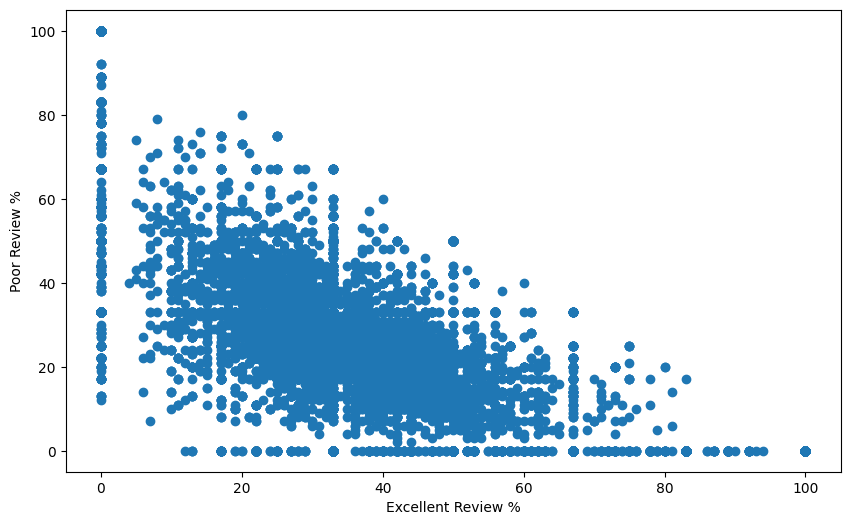

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(df['Excellent Review %'],df['Poor Review %'])
plt.xlabel('Excellent Review %')
plt.ylabel('Poor Review %')
plt.show()

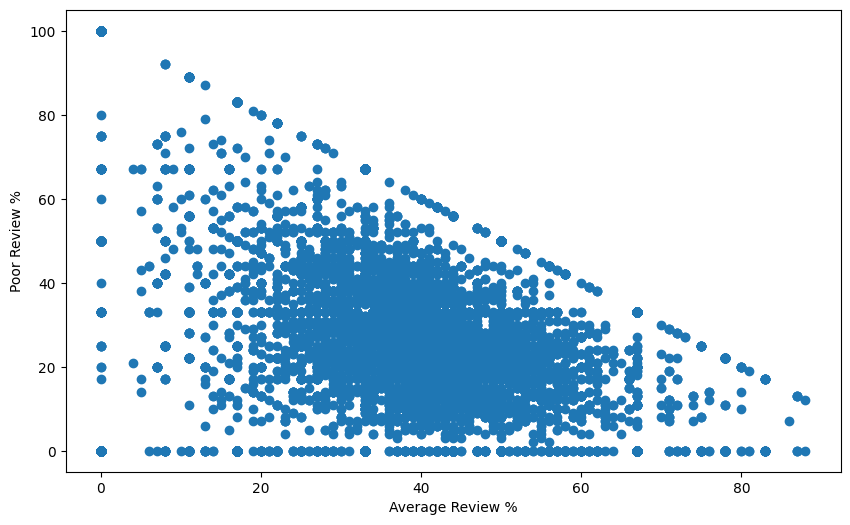

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(df['Average Review %'],df['Poor Review %'])
plt.xlabel('Average Review %')
plt.ylabel('Poor Review %')
plt.show()

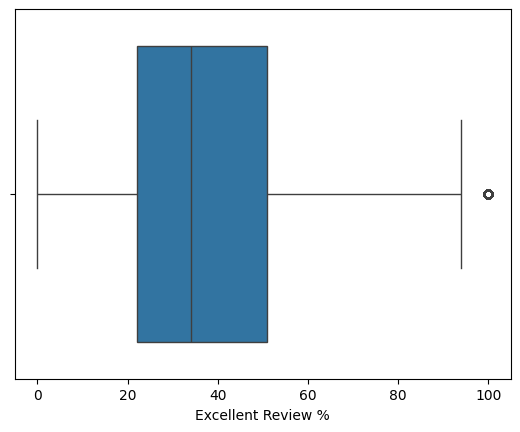

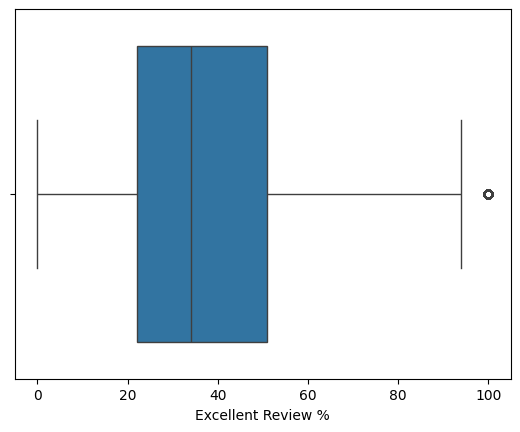

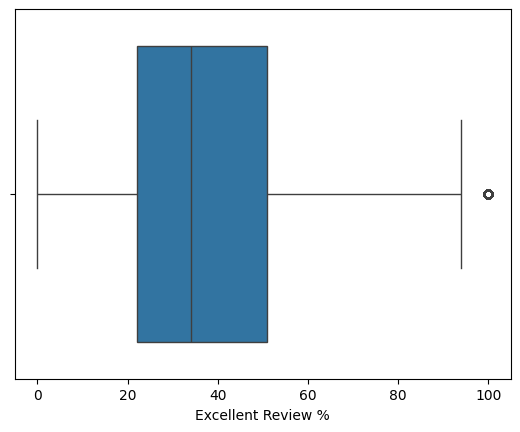

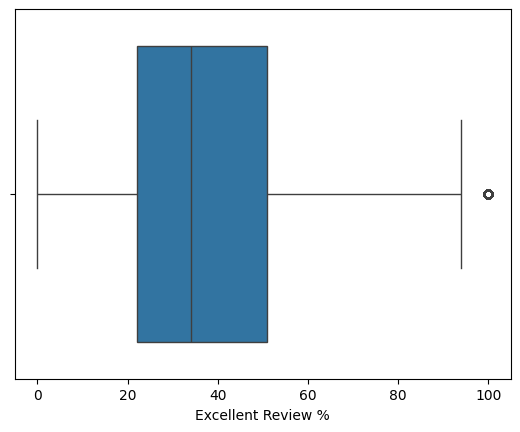

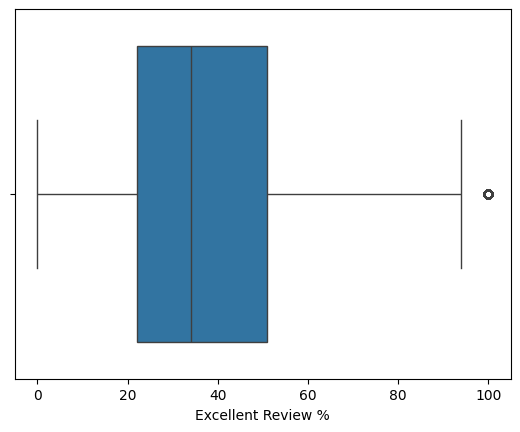

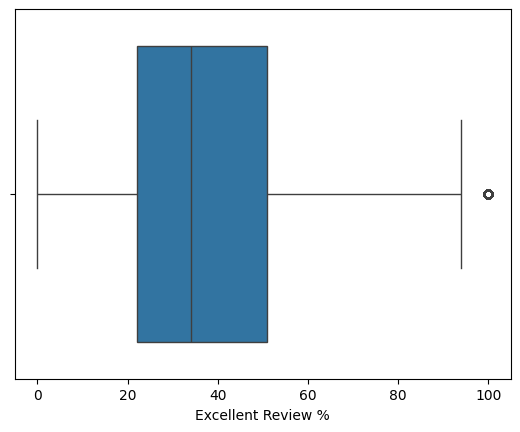

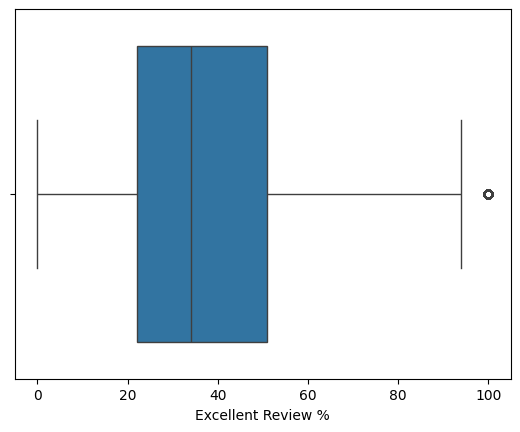

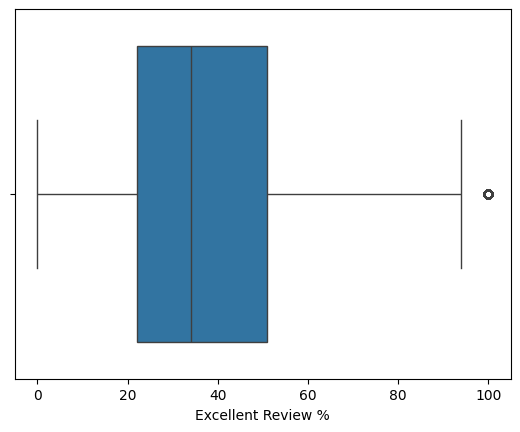

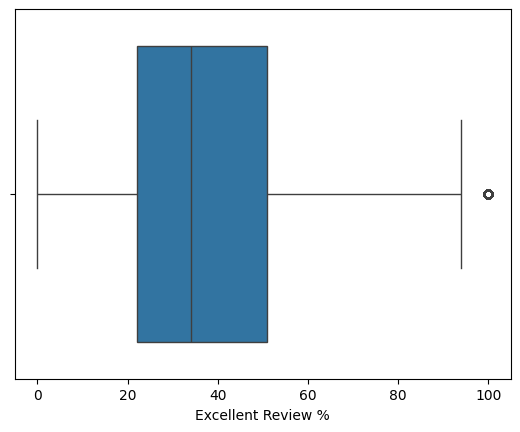

In [38]:
for i in df.columns:
  sns.boxplot(data=df,x='Excellent Review %')
  plt.show()

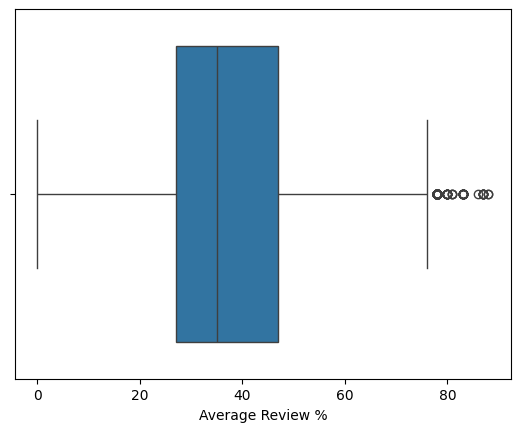

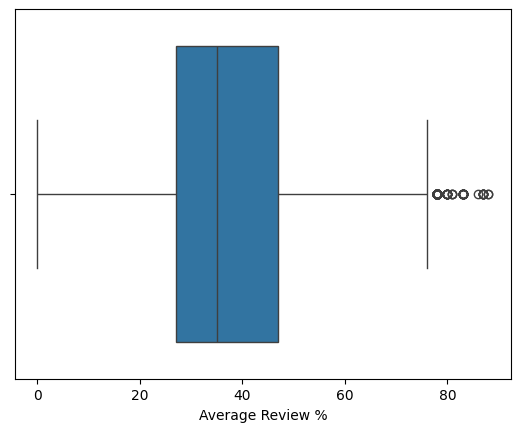

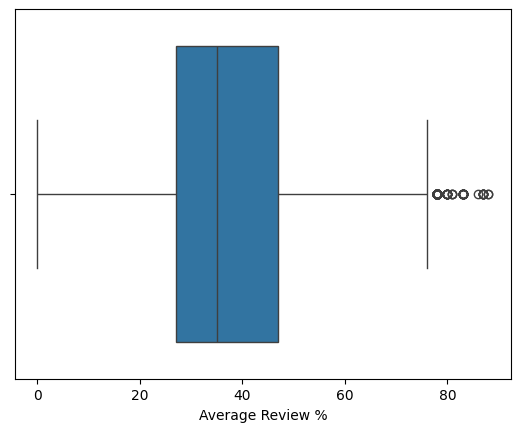

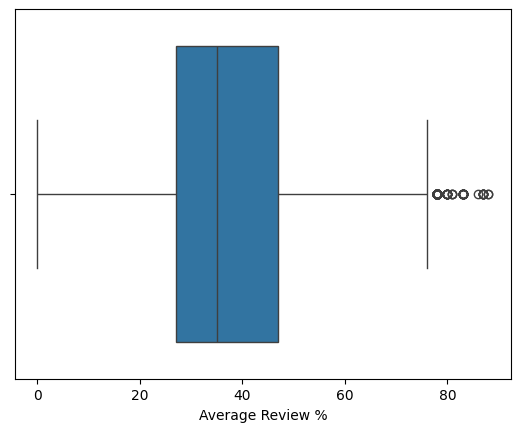

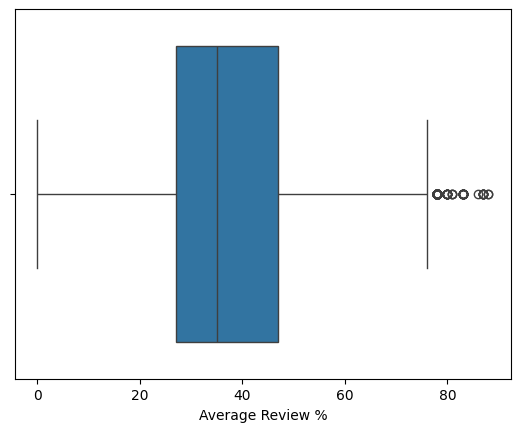

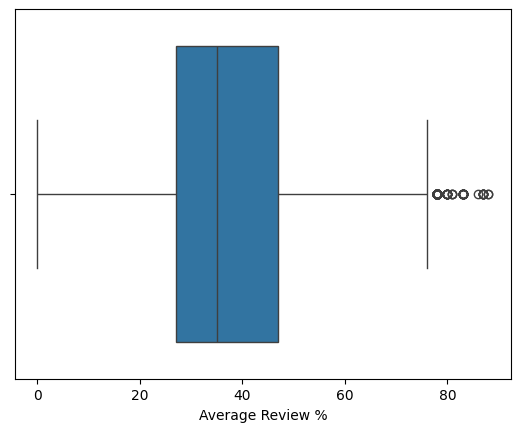

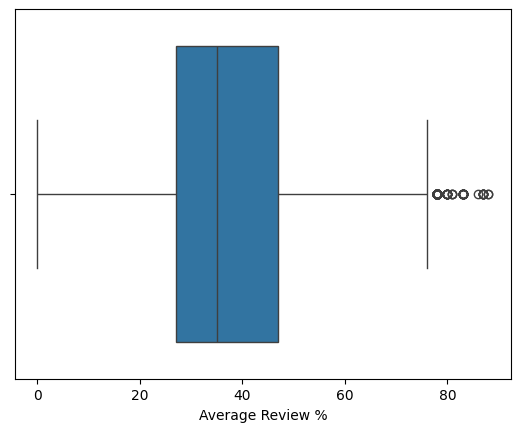

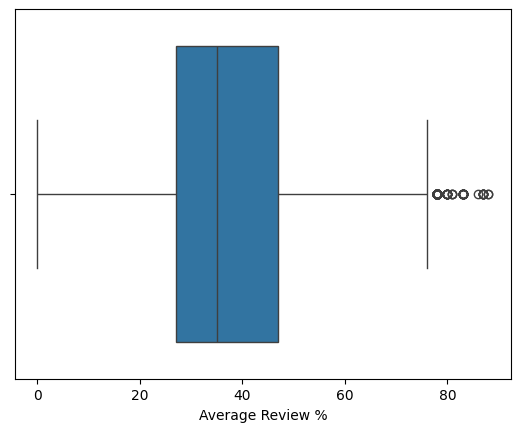

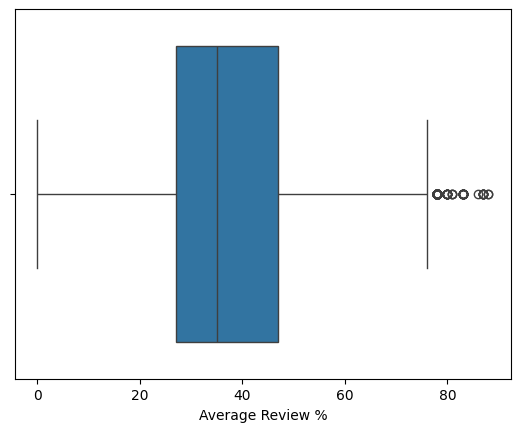

In [39]:
for i in df.columns:
  sns.boxplot(data=df,x='Average Review %')
  plt.show()

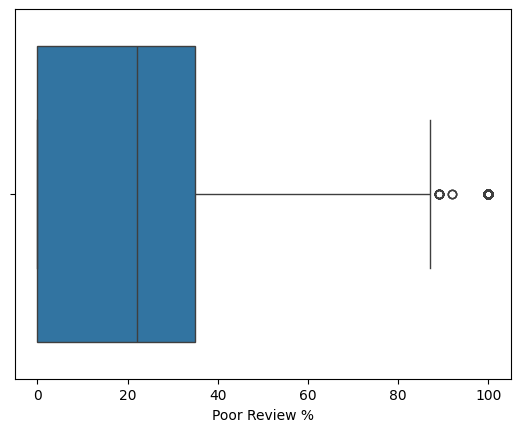

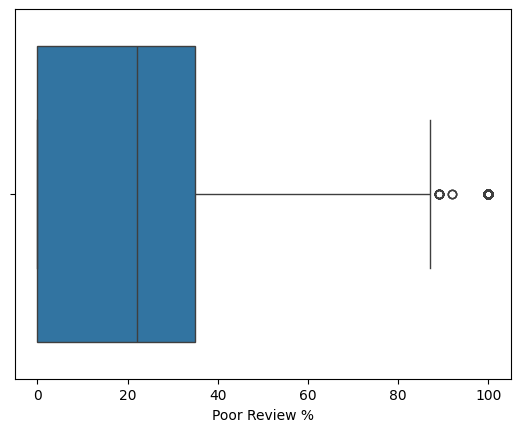

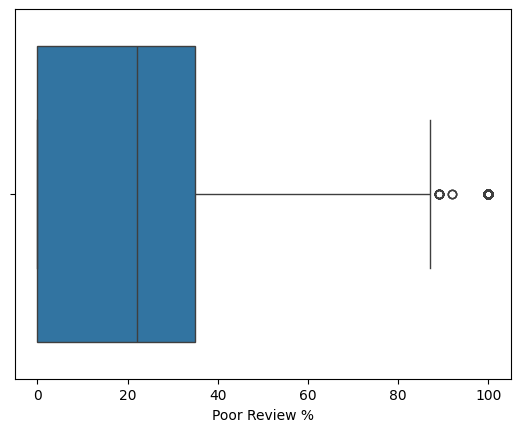

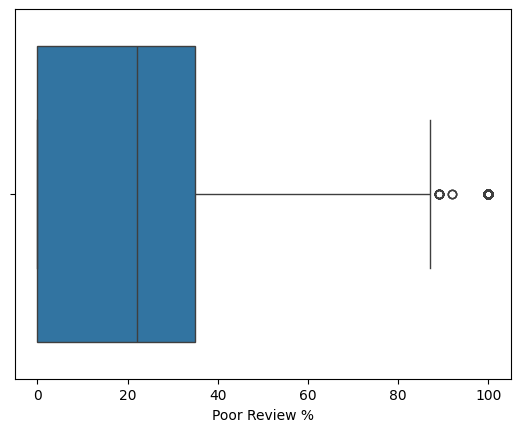

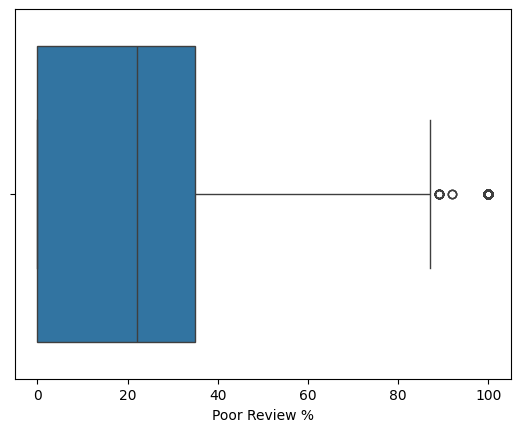

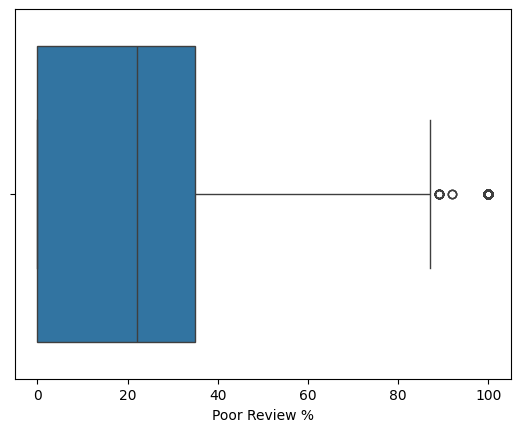

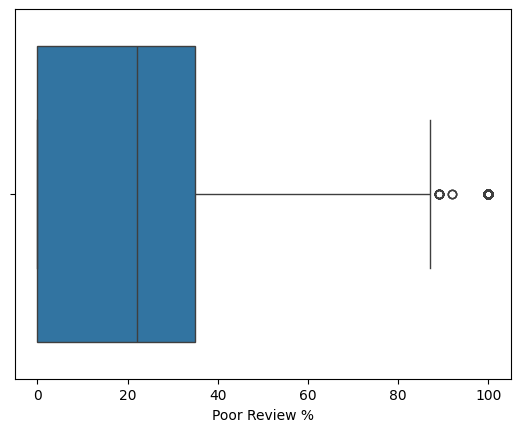

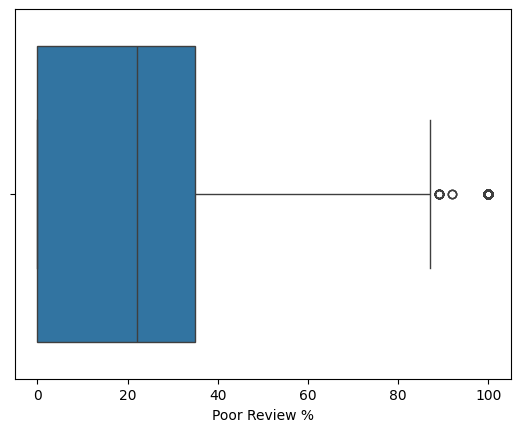

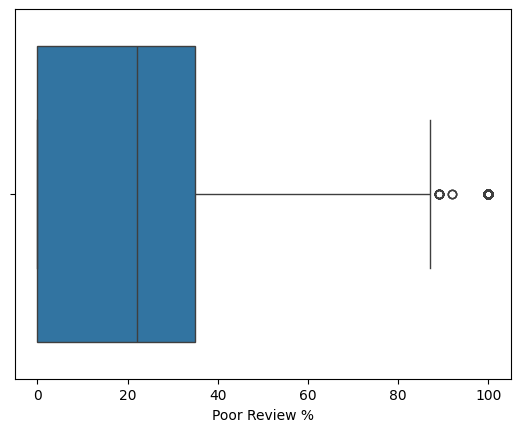

In [40]:
for i in df.columns:
  sns.boxplot(data=df,x='Poor Review %')
  plt.show()

In [41]:
df_numerical=['Excellent Review %', 'Average Review %',
       'Poor Review %']
print('df_numerical')

df_numerical


In [42]:
correlation_matrix = df[df_numerical].corr()
print(correlation_matrix)

                    Excellent Review %  Average Review %  Poor Review %
Excellent Review %            1.000000         -0.428875      -0.724835
Average Review %             -0.428875          1.000000      -0.311483
Poor Review %                -0.724835         -0.311483       1.000000


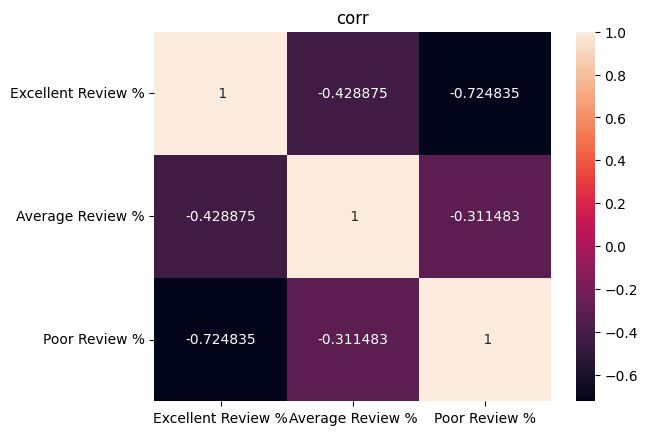

In [43]:
correlation_matrix=correlation_matrix
sns.heatmap(correlation_matrix,annot=True,fmt='2g')
plt.title('corr')
plt.show()

In [44]:
df.head(2)

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18


In [45]:
x=df[['Average Review %','Poor Review %']]
y=df['Excellent Review %']

In [46]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [47]:
print('X_train:\n',x_train)
print('\nx_test:\n',x_test)
print('/yn_train:\n',y_train.values)
print('\ny_test:\n',y_test.values)

X_train:
        Average Review %  Poor Review %
10641                33              0
6088                 33             67
11636                67              0
7445                 30             31
5124                 40              4
...                 ...            ...
11366                11             33
5216                 46             30
5415                 42             19
861                  33             17
7323                 33              0

[8218 rows x 2 columns]

x_test:
       Average Review %  Poor Review %
9794                55             17
1404                25              0
2194                34             33
3544                11             33
2950                67              0
...                ...            ...
9755                36             18
9669                42             10
2524                33              0
4583                33              0
2283                50             50

[3523 rows x 2 columns]
/yn_tr

In [48]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [49]:
model.fit(x_train,y_train)

LinearRegression()

In [51]:
y_pred = model.predict(x_test)
print(y_pred)

[2.80000000e+01 7.50000000e+01 3.30000000e+01 ... 6.70000000e+01
 6.70000000e+01 1.42108547e-14]


In [52]:
print(y_test)

9794    28
1404    75
2194    33
3544    56
2950    33
        ..
9755    46
9669    48
2524    67
4583    67
2283     0
Name: Excellent Review %, Length: 3523, dtype: int64


In [53]:
print(x_test)

      Average Review %  Poor Review %
9794                55             17
1404                25              0
2194                34             33
3544                11             33
2950                67              0
...                ...            ...
9755                36             18
9669                42             10
2524                33              0
4583                33              0
2283                50             50

[3523 rows x 2 columns]


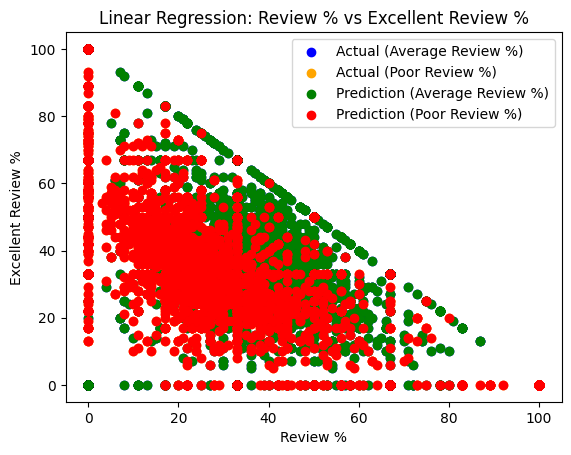

In [54]:
plt.scatter(x_test['Average Review %'], y_test, color='blue', label='Actual (Average Review %)')
plt.scatter(x_test['Poor Review %'], y_test, color='orange', label='Actual (Poor Review %)')
plt.scatter(x_test['Average Review %'], y_pred, color='green', label='Prediction (Average Review %)')
plt.scatter(x_test['Poor Review %'], y_pred, color='red', label='Prediction (Poor Review %)')

plt.xlabel('Review %')
plt.ylabel('Excellent Review %')
plt.title('Linear Regression: Review % vs Excellent Review %')
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [56]:
r2=r2_score(y_test, y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [57]:
print(f'R2 Score: {r2:4f}')
print(f'Mean Squared Error:{mse:4f}')
print(f'Root Meean Error:{mse:4f}')


R2 Score: 1.000000
Mean Squared Error:0.000000
Root Meean Error:0.000000


In [58]:
###During my learning journey, I worked on a Kaggle dataset project called ‘11000 Medicine Details’.
The main goal of this project was to understand customer satisfaction and review patterns of different medicines and predict how review percentages may behave using Machine Learning.

I used Python along with libraries like Pandas, Matplotlib, Seaborn, and Scikit-learn for this project.

First, I did data cleaning — I removed duplicates, handled missing values, and made sure the dataset was ready for analysis.
Then, I performed exploratory data analysis (EDA) using histograms and scatter plots to understand Excellent Review %, Average Review %, and Poor Review %.

After that, I applied machine learning models like Linear Regression and Correlation Analysis to study the relationships between review percentages and to predict possible customer ratings.
The model helped me understand how different review factors influence each other — for example, when Excellent Review % increases, Poor Review % decreases.

SyntaxError: invalid character '—' (U+2014) (ipython-input-3280414769.py, line 6)